In [ ]:
!pip install netCDF4 --q

In [ ]:
import netCDF4 as nc
from netCDF4 import Dataset
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import numpy as np
import pandas
import matplotlib as plt

In [ ]:
#Uploading Data and Variables
data = nc.Dataset('/content/test24hr.nc')

#print(data['temp'].shape)

rain_data = data["precip_liquid"]
rain_data = rain_data[:,[28],0,[10]]

wind_data = data['uvel']
wind_data = wind_data[:,[28],0,[10]]

temp_data = data['temp']
temp_data = temp_data[:,[28],0,[10]]

time = data['t']
time = np.asarray(time)

In [ ]:
#Splitting Training/Testing Data
time_train,time_test,precip_train,precip_test  = train_test_split(time,rain_data,test_size=.2 )
time_train,time_test,uvel_train,uvel_test = train_test_split(time,wind_data,test_size=.2)
time_train,time_test,temp_train,temp_test = train_test_split(time,temp_data, test_size=.2)

training_data = [time_train, precip_train,uvel_train,temp_train]
testing_data = [time_test, precip_test,uvel_test,temp_test]
data = [time,rain_data, wind_data,temp_data]

In [ ]:
#Normalizing Data
scaler = MinMaxScaler()
nsamples, nx, ny = precip_train.shape
rain_data_norm = precip_train.reshape((nsamples,nx*ny))
wind_data_norm = uvel_train.reshape((nsamples,nx*ny))
temp_data_norm = temp_train.reshape((nsamples,nx*ny))

precip_train = scaler.fit_transform(rain_data_norm)
uvel_train = scaler.fit_transform(wind_data_norm)
temp_train = scaler.fit_transform(temp_data_norm)

training = [precip_train,uvel_train,temp_train]
testing = [precip_test,uvel_test,temp_test]

In [ ]:
from tensorflow.keras.models import Model
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      keras.layers.Flatten(),
      keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      keras.layers.Dense(784, activation='sigmoid'),
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model.tf',save_best_only=True, monitor='val_loss',mode = 'min', verbose=1)

In [ ]:
autoencoder.fit(time_train, training,
                epochs=100,
                verbose=0,
                shuffle=False,
                validation_data=(time_test, testing),
                callbacks=[checkpoint])
#TO DO: only print every 100 epochs


Epoch 1: val_loss improved from inf to 0.38636, saving model to best_model.tf



Epoch 2: val_loss improved from 0.38636 to 0.28825, saving model to best_model.tf



Epoch 3: val_loss improved from 0.28825 to 0.22843, saving model to best_model.tf



Epoch 4: val_loss improved from 0.22843 to 0.20535, saving model to best_model.tf



Epoch 5: val_loss improved from 0.20535 to 0.19133, saving model to best_model.tf



Epoch 6: val_loss improved from 0.19133 to 0.18112, saving model to best_model.tf



Epoch 7: val_loss improved from 0.18112 to 0.16709, saving model to best_model.tf



Epoch 8: val_loss improved from 0.16709 to 0.15816, saving model to best_model.tf



Epoch 9: val_loss improved from 0.15816 to 0.15434, saving model to best_model.tf



Epoch 10: val_loss improved from 0.15434 to 0.14541, saving model to best_model.tf



Epoch 11: val_loss improved from 0.14541 to 0.13775, saving model to best_model.tf



Epoch 12: val_loss improved from 0.13775 to 0.13138, saving model to best_model.tf



Epoch 13: val_loss improved from 0.13138 to 0.11990, saving model to best_model.tf



Epoch 14: val_loss improved from 0.11990 to 0.10969, saving model to best_model.tf



Epoch 15: val_loss improved from 0.10969 to 0.09948, saving model to best_model.tf



Epoch 16: val_loss improved from 0.09948 to 0.09184, saving model to best_model.tf



Epoch 17: val_loss improved from 0.09184 to 0.08801, saving model to best_model.tf



Epoch 18: val_loss improved from 0.08801 to 0.08036, saving model to best_model.tf



Epoch 19: val_loss improved from 0.08036 to 0.07270, saving model to best_model.tf



Epoch 20: val_loss improved from 0.07270 to 0.06122, saving model to best_model.tf



Epoch 21: val_loss improved from 0.06122 to 0.05485, saving model to best_model.tf



Epoch 22: val_loss improved from 0.05485 to 0.04591, saving model to best_model.tf



Epoch 23: val_loss improved from 0.04591 to 0.03698, saving model to best_model.tf



Epoch 24: val_loss improved from 0.03698 to 0.02679, saving model to best_model.tf



Epoch 25: val_loss improved from 0.02679 to 0.02296, saving model to best_model.tf



Epoch 26: val_loss improved from 0.02296 to 0.01658, saving model to best_model.tf



Epoch 27: val_loss improved from 0.01658 to 0.00765, saving model to best_model.tf



Epoch 28: val_loss improved from 0.00765 to 0.00638, saving model to best_model.tf



Epoch 29: val_loss improved from 0.00638 to 0.00383, saving model to best_model.tf



Epoch 30: val_loss improved from 0.00383 to 0.00255, saving model to best_model.tf



Epoch 31: val_loss improved from 0.00255 to 0.00128, saving model to best_model.tf



Epoch 32: val_loss improved from 0.00128 to 0.00000, saving model to best_model.tf



Epoch 33: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 34: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 35: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 36: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 37: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 38: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 39: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 40: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 41: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 42: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 43: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 44: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 45: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 46: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 47: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 48: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 49: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 50: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 51: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 52: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 53: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 54: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 55: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 56: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 57: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 58: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 59: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 60: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 61: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 62: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 63: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 64: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 65: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 66: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 67: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 68: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 69: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 70: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 71: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 72: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 73: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 74: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 75: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 76: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 77: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 78: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 79: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 80: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 81: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 82: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 83: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 84: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 85: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 86: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 87: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 88: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 89: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 90: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 91: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 92: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 93: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 94: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 95: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 96: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 97: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 98: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 99: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf



Epoch 100: val_loss improved from 0.00000 to 0.00000, saving model to best_model.tf


Text(0, 0.5, 'precipitation (precip_liquid)')

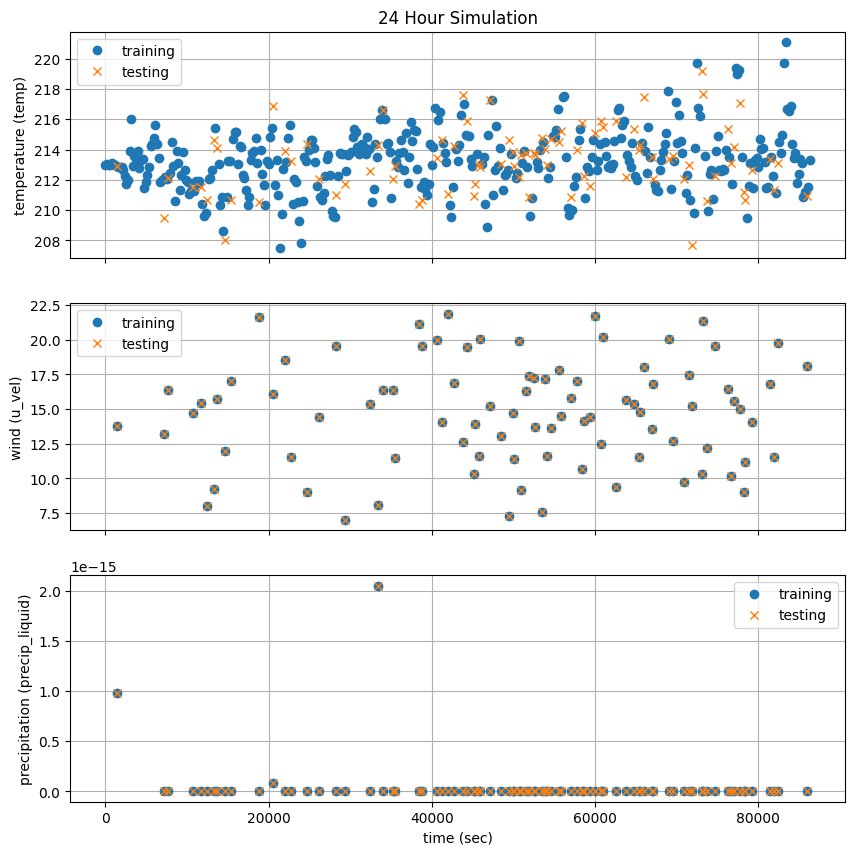

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,sharex=True, sharey=False,figsize= (10,10))

training_data[1] = training_data[1].reshape(-1,)
training_data[2] = training_data[2].reshape(-1,)
training_data[3] = training_data[3].reshape(-1,)

testing_data[1] = testing_data[1].reshape(-1,)
testing_data[2] = testing_data[2].reshape(-1,)
testing_data[3] = testing_data[3].reshape(-1,)

ax[0].plot(time_train, training_data[3],'o',time_test, testing_data[3],'x')
ax[0].grid()
ax[0].set_title('24 Hour Simulation')
ax[0].legend(['training','testing'])
ax[0].set_ylabel('temperature (temp)')

ax[1].plot(time_test, testing_data[2],'o',time_test, testing_data[2],'x')
ax[1].grid()
ax[1].legend(['training','testing'])
ax[1].set_ylabel('wind (u_vel)')

ax[2].plot(time_test, testing_data[1],'o',time_test, testing_data[1],'x')
ax[2].grid()
ax[2].legend(['training','testing'])
ax[2].set_xlabel('time (sec)')
ax[2].set_ylabel('precipitation (precip_liquid)')